In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('superconduct/train.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
data.shape    # Shape (rows, columns) of the dataset

(21263, 82)

In [6]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [7]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [8]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")

This dataset has 66 duplicated rows

The duplicate rows have been dropped from the dataset now


In [9]:
# Dataset shape after handling missing values and duplicates
data.shape

(21197, 82)

In [10]:
data.describe()     # Gives a descriptive statistical summary of the data columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,...,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.120300,87.544201,72.945331,71.253164,58.474874,1.166782,1.065103,115.751945,33.204053,44.436401,...,3.148856,3.052542,3.051485,1.297020,1.053977,2.042553,1.480890,0.839692,0.674168,34.494532
std,1.438282,29.643136,33.460789,30.990774,36.615381,0.364712,0.401225,54.584784,26.966285,20.019732,...,1.189878,1.044637,1.173221,0.392834,0.380121,1.243242,0.977545,0.485002,0.456038,34.276465
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.522475,52.143839,58.041225,35.247208,0.972995,0.781227,78.899680,16.799962,32.890369,...,2.116279,2.267933,2.090896,1.060857,0.778998,1.000000,0.921250,0.451754,0.306892,5.380000
50%,4.000000,84.922750,60.689236,66.361592,39.873869,1.199541,1.148465,122.906070,26.601500,45.123500,...,2.605455,2.615321,2.428047,1.368922,1.169665,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.374260,85.982703,78.019689,73.056021,1.444537,1.360388,154.119320,38.336200,59.356406,...,4.007317,3.662842,3.909523,1.589027,1.331531,3.000000,1.910400,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


(array([3., 1., 2., 0., 0., 4., 1., 7., 2., 4., 1., 1., 4., 0., 3., 3., 0.,
        1., 0., 0., 0., 4., 1., 0., 2., 1., 3., 2., 1., 4., 3., 1., 2., 1.,
        2., 6., 6., 2., 1., 2.]),
 array([-0.63192366, -0.59810156, -0.56427946, -0.53045736, -0.49663526,
        -0.46281316, -0.42899106, -0.39516896, -0.36134686, -0.32752476,
        -0.29370266, -0.25988057, -0.22605847, -0.19223637, -0.15841427,
        -0.12459217, -0.09077007, -0.05694797, -0.02312587,  0.01069623,
         0.04451833,  0.07834043,  0.11216253,  0.14598463,  0.17980672,
         0.21362882,  0.24745092,  0.28127302,  0.31509512,  0.34891722,
         0.38273932,  0.41656142,  0.45038352,  0.48420562,  0.51802772,
         0.55184982,  0.58567192,  0.61949401,  0.65331611,  0.68713821,
         0.72096031]),
 <BarContainer object of 40 artists>)

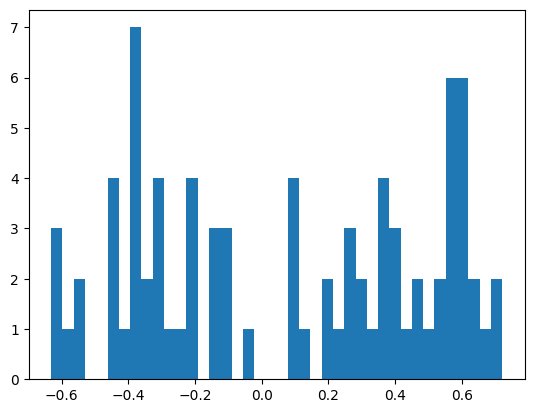

In [11]:
# Histogram for critical_temp

correlation = data.corr()
correlation = correlation.drop('critical_temp', axis=0)
plt.hist(correlation['critical_temp'], bins=40)

# This is being done to get a visual idea of the number of features we intend to drop, that lie outside a certain 
# threshold range. Since we plan on dropping about 1/4th of the features, we can set the threshold to remove 
# about 25% of the total number of features, and bringing it to about 60 features. 

In [12]:
for k, v in correlation['critical_temp'].items():
    print(f"{k}, {v}")

# From the output, we find that this really doesn't achieve much here with respect to the correlation 
# values for the 'critical_temp' column, since here, -ve values are taken to be less that the positive values, 
# irrespective of absolute difference in values, which is not the case we are looking at here, since
# our aim is to remove cols which don't meet a certain threshold, and that would possibly mean removing all 
# cols that have a negative correlation irrespective of how much it affects the 'critical_temp' column. 

number_of_elements, 0.600394055182847
mean_atomic_mass, -0.11317839649303417
wtd_mean_atomic_mass, -0.3119832502072971
gmean_atomic_mass, -0.22994106405006937
wtd_gmean_atomic_mass, -0.3694840714111939
entropy_atomic_mass, 0.5428941726044171
wtd_entropy_atomic_mass, 0.6265356613492065
range_atomic_mass, 0.4916424215328923
wtd_range_atomic_mass, -0.3372375169225366
std_atomic_mass, 0.378519448391443
wtd_std_atomic_mass, 0.35892821196282804
mean_fie, 0.10140062987501358
wtd_mean_fie, 0.3978883959339062
gmean_fie, -0.025680476288429257
wtd_gmean_fie, 0.3428140319387177
entropy_fie, 0.5671556479141354
wtd_entropy_fie, 0.3877026432771749
range_fie, 0.6001786440355417
wtd_range_fie, 0.29963177976562727
std_fie, 0.5410910690832423
wtd_std_fie, 0.5814422035843121
mean_atomic_radius, 0.10610167692790742
wtd_mean_atomic_radius, -0.29606092702537734
gmean_atomic_radius, -0.14266782717596035
wtd_gmean_atomic_radius, -0.4042285854629204
entropy_atomic_radius, 0.5582491219463678
wtd_entropy_atomic_r

In [13]:
# Creating a separate df to get absolute values of critical_temp in correlation, since we intend to get the 
# features that are only highly correlated with critical_temp, the comparison for which can only be made 
# by taking the absolute values of critical_temp. Since we are interested in reducing the number of features, 
# we will be dropping the features that are less correlated with critical_temp, which is about 1/4th of the cols. 

corr_abs = correlation['critical_temp'].abs()

In [14]:
# Drop every row in corr_abs, where the value of that row is less than or equal to 0.260928 and get the names of the rows dropped

row_names = []

corr_abs = corr_abs[corr_abs < 0.260928]

for k, v in corr_abs.items():
    row_names.append(k)

In [15]:
# Dropping columns that have a correlation value less than 0.26 (~25% of the columns of the dataset)

for col_name in row_names:
    data = data.drop(col_name, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21197 entries, 0 to 21262
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_elements             21197 non-null  int64  
 1   wtd_mean_atomic_mass           21197 non-null  float64
 2   wtd_gmean_atomic_mass          21197 non-null  float64
 3   entropy_atomic_mass            21197 non-null  float64
 4   wtd_entropy_atomic_mass        21197 non-null  float64
 5   range_atomic_mass              21197 non-null  float64
 6   wtd_range_atomic_mass          21197 non-null  float64
 7   std_atomic_mass                21197 non-null  float64
 8   wtd_std_atomic_mass            21197 non-null  float64
 9   wtd_mean_fie                   21197 non-null  float64
 10  wtd_gmean_fie                  21197 non-null  float64
 11  entropy_fie                    21197 non-null  float64
 12  wtd_entropy_fie                21197 non-null  floa

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


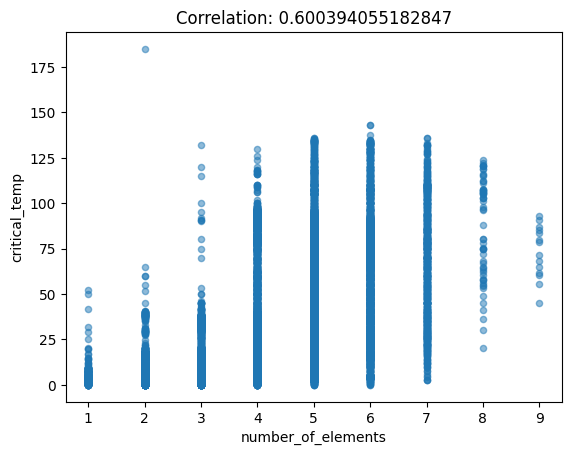

<Figure size 1000x1000 with 0 Axes>

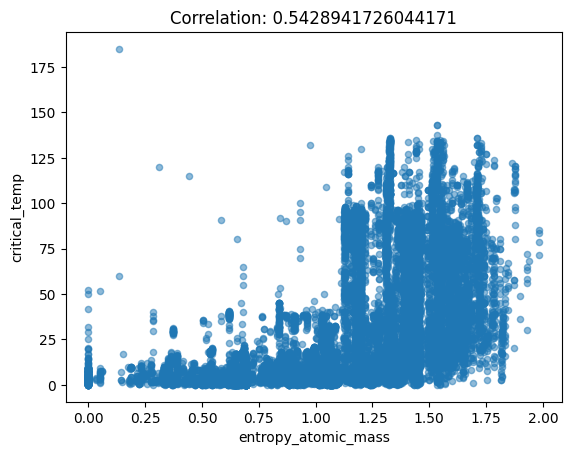

<Figure size 1000x1000 with 0 Axes>

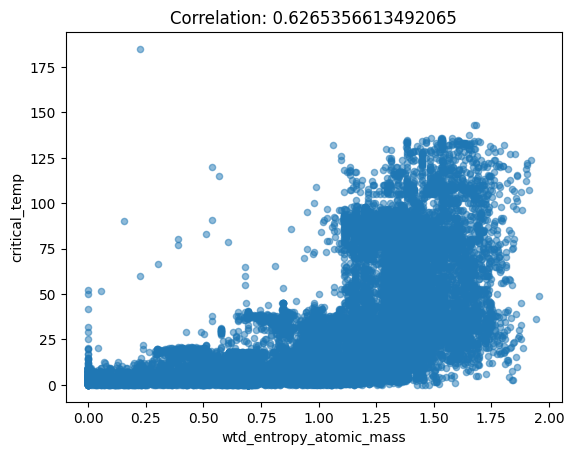

<Figure size 1000x1000 with 0 Axes>

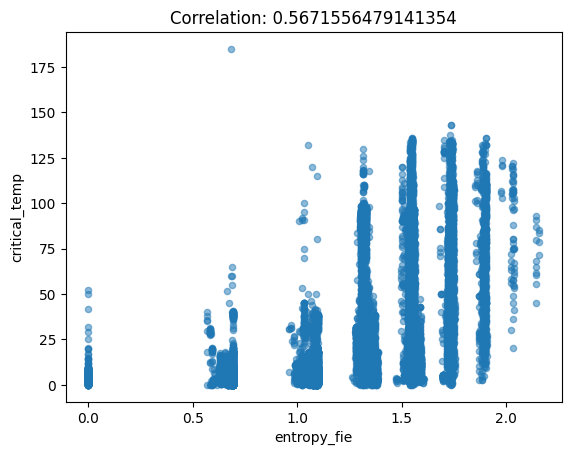

<Figure size 1000x1000 with 0 Axes>

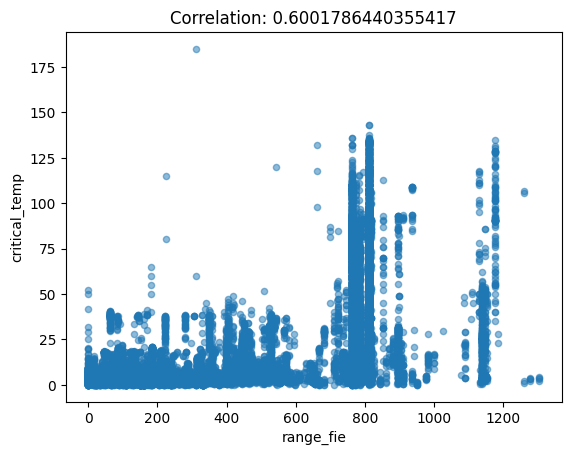

<Figure size 1000x1000 with 0 Axes>

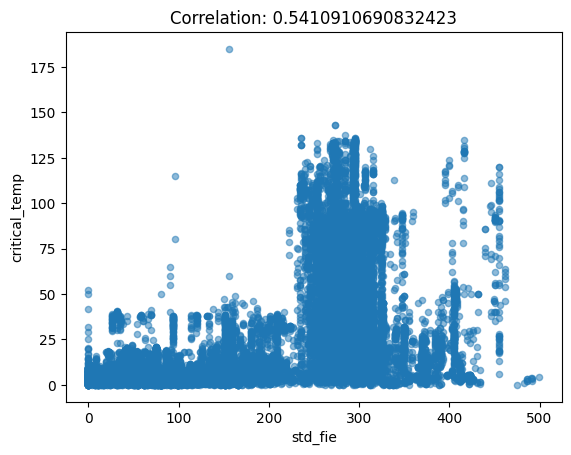

<Figure size 1000x1000 with 0 Axes>

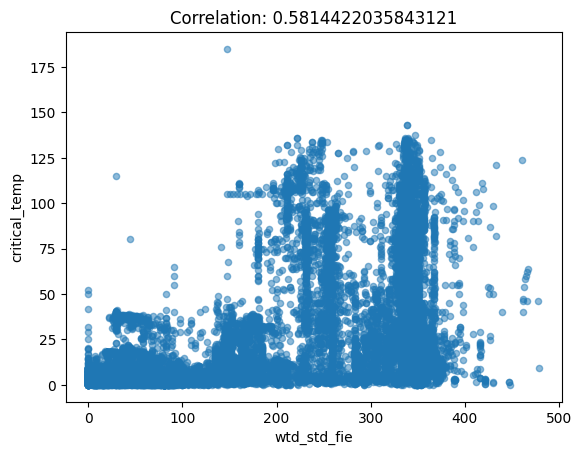

<Figure size 1000x1000 with 0 Axes>

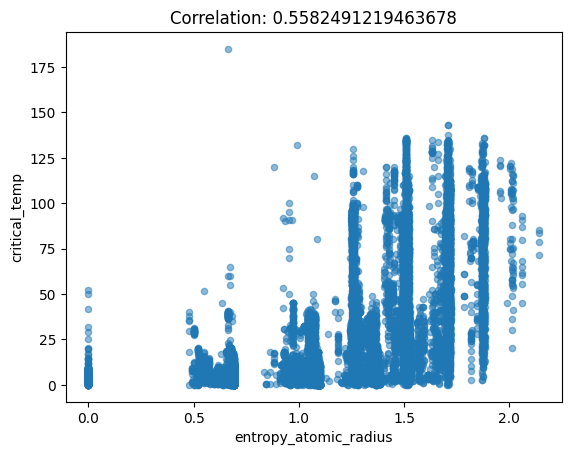

<Figure size 1000x1000 with 0 Axes>

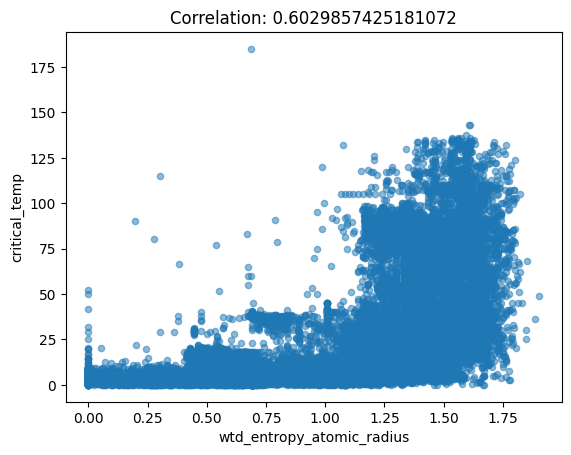

<Figure size 1000x1000 with 0 Axes>

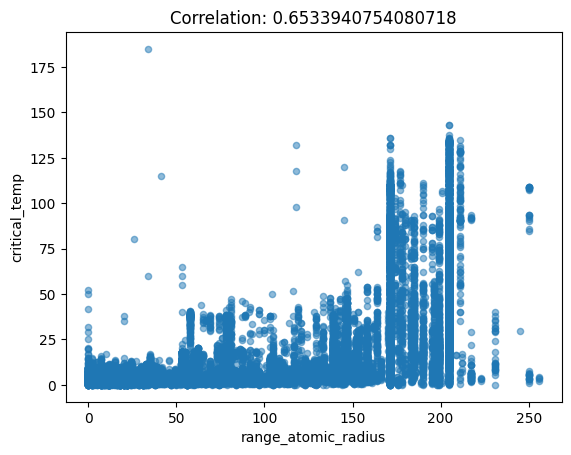

<Figure size 1000x1000 with 0 Axes>

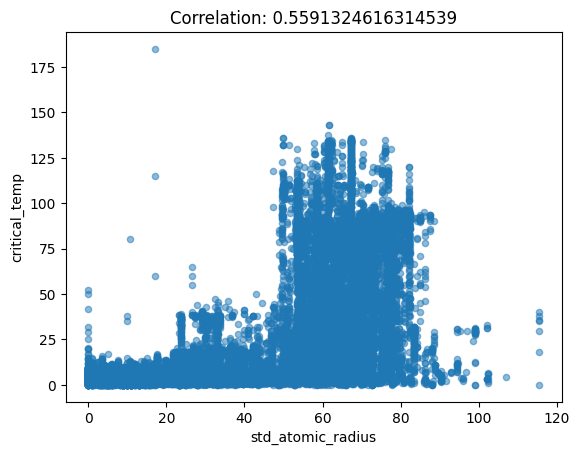

<Figure size 1000x1000 with 0 Axes>

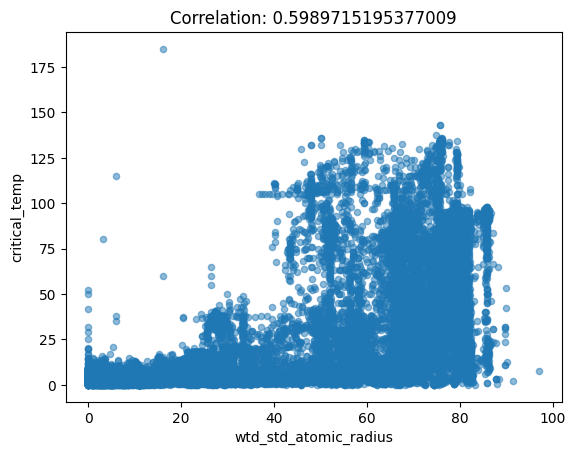

<Figure size 1000x1000 with 0 Axes>

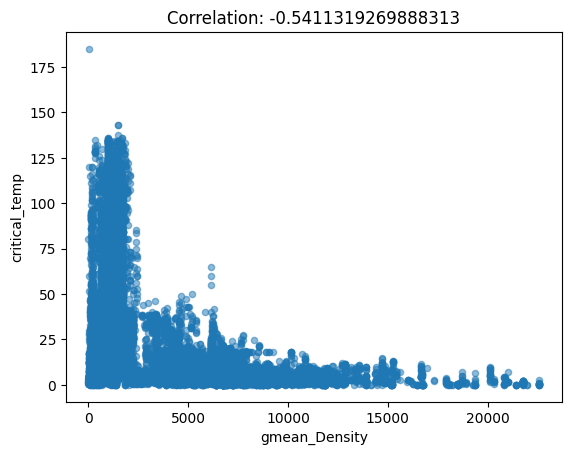

<Figure size 1000x1000 with 0 Axes>

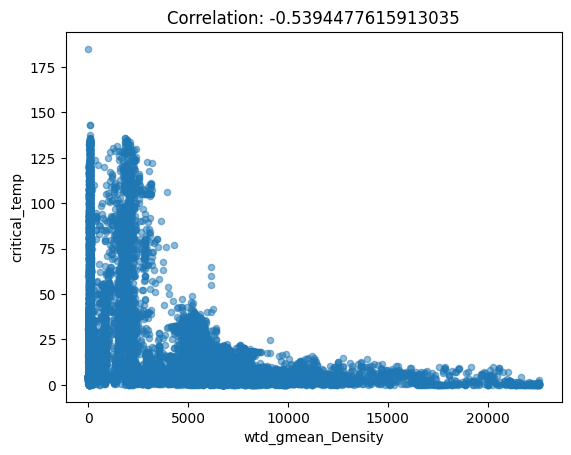

<Figure size 1000x1000 with 0 Axes>

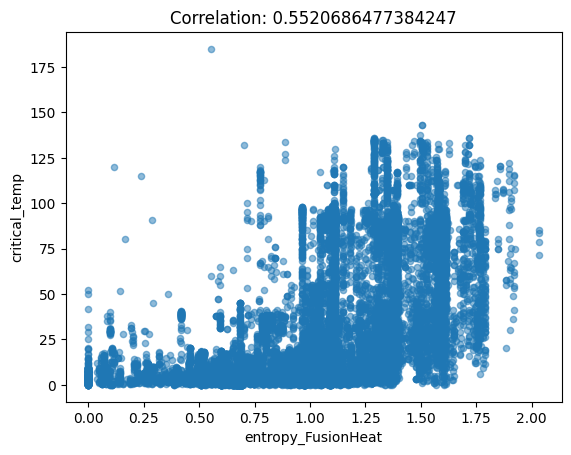

<Figure size 1000x1000 with 0 Axes>

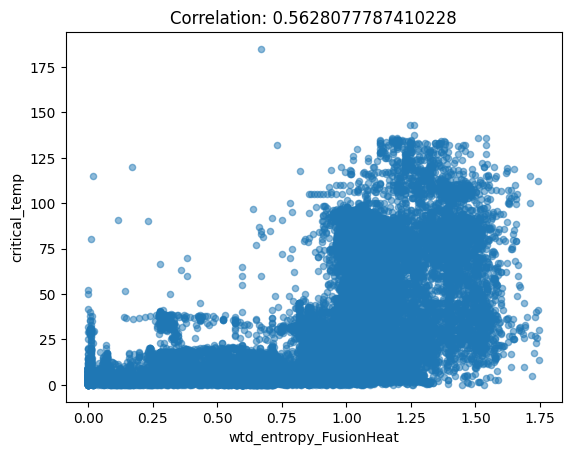

<Figure size 1000x1000 with 0 Axes>

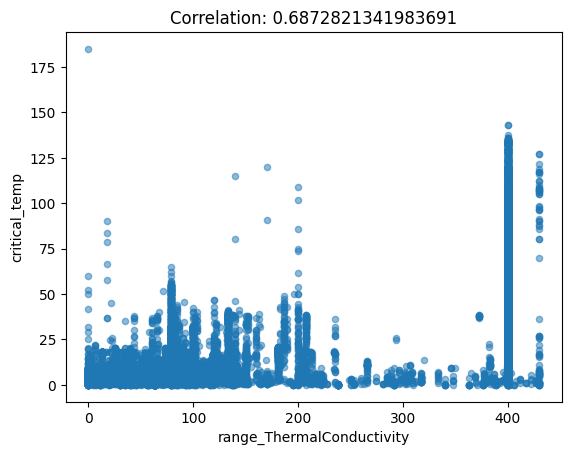

<Figure size 1000x1000 with 0 Axes>

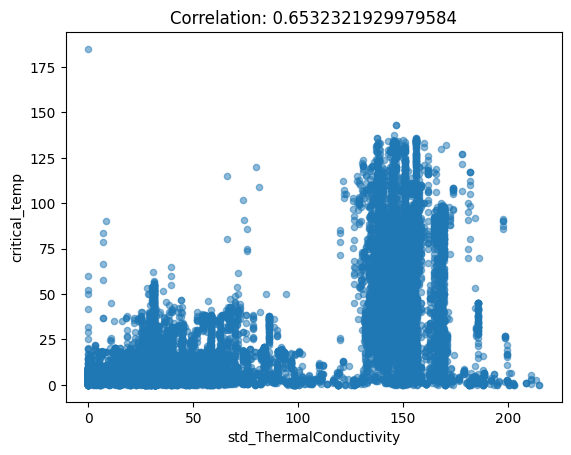

<Figure size 1000x1000 with 0 Axes>

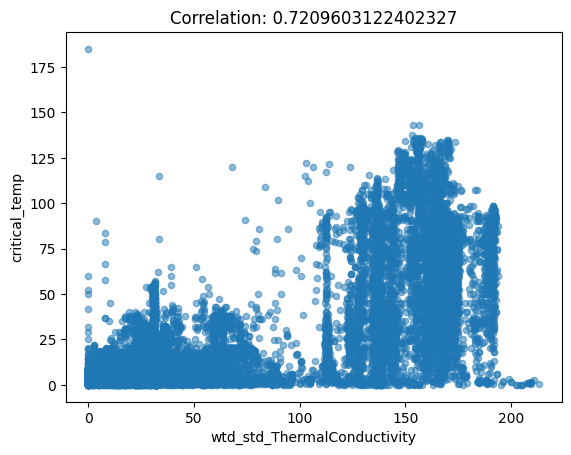

<Figure size 1000x1000 with 0 Axes>

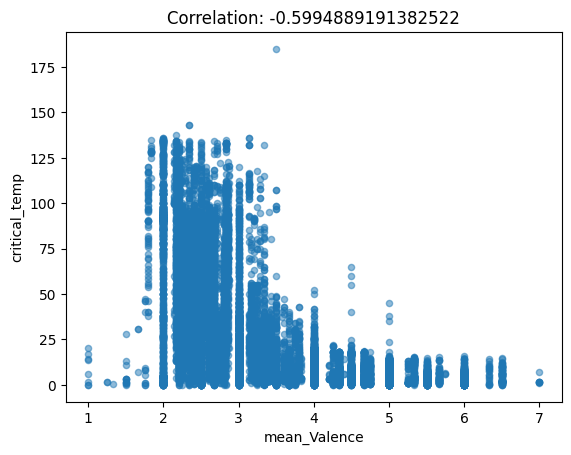

<Figure size 1000x1000 with 0 Axes>

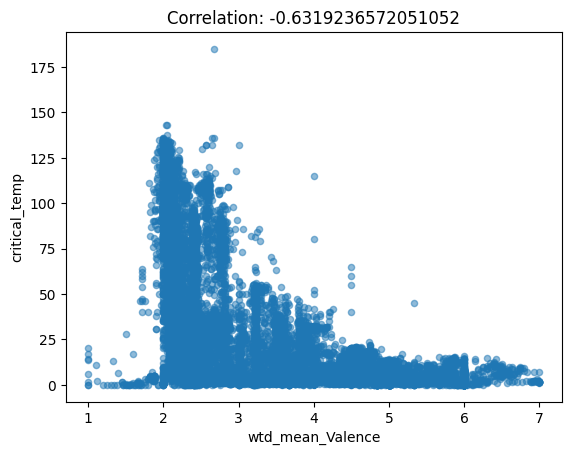

<Figure size 1000x1000 with 0 Axes>

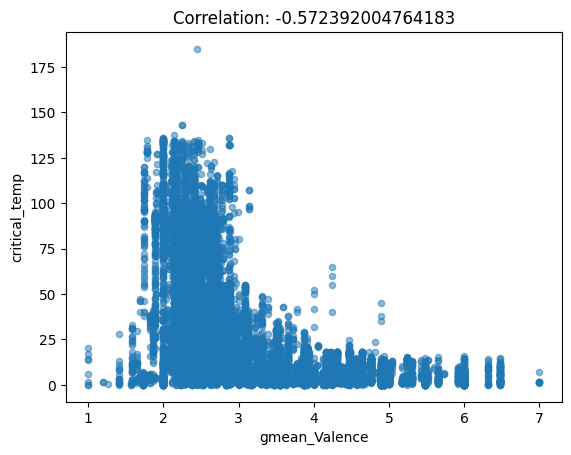

<Figure size 1000x1000 with 0 Axes>

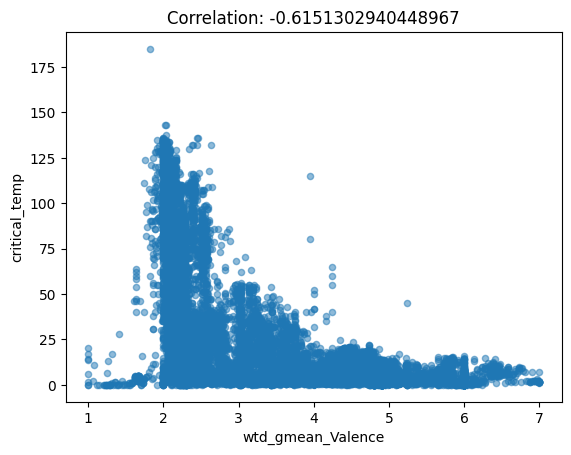

<Figure size 1000x1000 with 0 Axes>

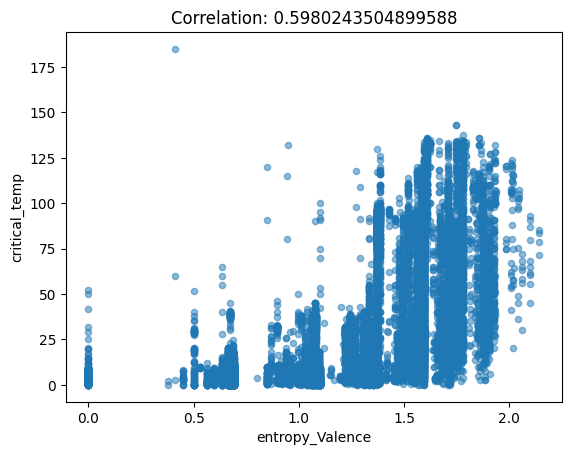

<Figure size 1000x1000 with 0 Axes>

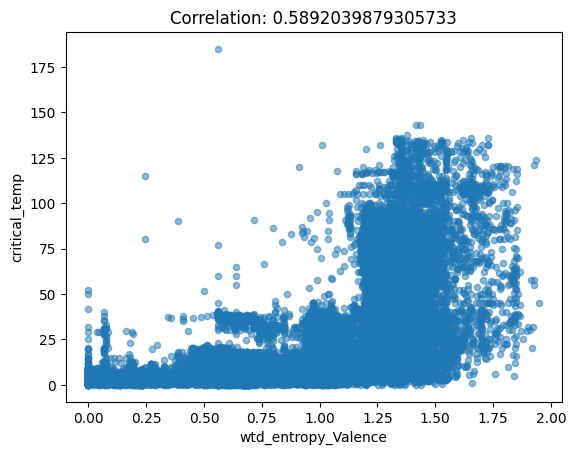

<Figure size 1000x1000 with 0 Axes>

In [16]:
features = []

for k, v in correlation['critical_temp'].items():
  if abs(v) > 0.5:
    features.append(k)      # Features with correlation value greater than 0.5 for the purpose of plotting


for k, v in correlation['critical_temp'].items():

  if abs(v) > 0.5:
    
    try:
        data.plot(kind='scatter', x=k, y='critical_temp', alpha=0.5)   # Plotting features with correlation value greater than 0.5
        plt.title(f"Correlation: {v}")
        plt.figure(figsize=(10, 10))


    except ValueError:   # To avoid kernel crashing due to ValueError
        break;


R2 score on test data 0.7228644937415354

Coeffs: [-4.45204076e-01 -8.06759845e-02  1.60412175e-01 -3.46393464e+01
  2.25260353e+01  2.27400570e-01 -8.23381078e-02 -1.22705007e-01
 -2.67593594e-01  7.90382072e-02 -6.47386447e-02  6.58257671e+01
  4.16336198e+01  7.85994796e-02  6.67212437e-03 -1.20878175e-01
 -1.04643388e-01  2.18354019e+00 -2.08358364e+00 -1.07311042e+01
  2.83869080e+01  1.89454687e-01  2.42096795e-03 -7.73252130e-01
  5.02794206e-02 -1.34083460e-03 -3.26669638e-03 -1.19635461e-03
  4.17812989e-03 -5.03363403e+00 -1.32010301e+01  8.31199213e-04
 -2.74020991e-02 -1.79560248e+01 -3.33227050e-01  8.75251661e-01
 -1.59957590e-01  3.09050225e-01 -1.18140067e+00 -3.15899770e-01
  9.20648427e-01  9.54829191e-01  2.43975403e+01  5.38822739e-01
 -1.18850982e-01  7.80003496e-01  2.05205664e-02 -5.32198836e-01
 -9.83013926e-02 -3.21897744e-01  3.63436182e-01 -1.73402339e-01
  6.62427217e+00 -2.22447816e+01  1.67320787e+00  1.41360464e+01
 -1.76764494e+01 -7.63200408e+01  6.287

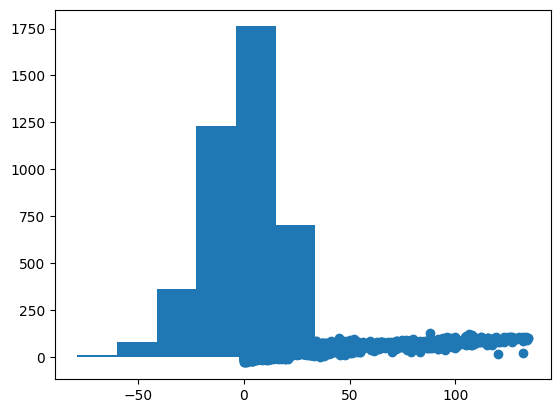

In [17]:
# Importing linear regression from sklearn and splitting 'data' into 0.8 train and 0.2 test

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model and fit it to the training data

model = LinearRegression()
model.fit(X_train, y_train)

# Getting the model's score on the testing data

print('\nR2 score on test data', model.score(X_test, y_test))

# Getting the model's coefficients

print('\nCoeffs:', model.coef_)

# Getting the model's intercept

print('\nIntercepts', model.intercept_)

# Getting the model's predictions on the test data

y_pred = model.predict(X_test)

# Plotting a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred)

# Plotting a histogram of the residuals

plt.hist(y_test - y_pred)

# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10)
print('\n', scores.mean(), '+/-', scores.std())

# TO ADD
# scores = cross_val_score(model, X, y, cv=10)